In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

from DimensionReduction import Grassmann
from DimensionReduction import DiffusionMaps

import proplot as pplt

# Plotting parameters
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["legend.fontsize"] = 12.5
mpl.rcParams["font.size"] = 13.5
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.1
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["figure.figsize"] = (6, 4)

pplt.rc['grid.linewidth'] = 0.04
pplt.rc['grid.alpha'] = 0.01

USE_TEX = False

if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")


#  Structured data on the unit sphere in $\mathbb{R}^3$

We consider the following set of equations used to construct our dataset:

\begin{array}{cc}
x&=|r|\sin(t)\cos(s),\\
y&=r\sin(t)\sin(s),\\
z&=|r|\cos(t),
\end{array}

where $r$ is uniformly distributed in the interval $[-2, 2]$, $t$ is uniformly distributed in the interval $[-\pi/2, \pi/2]$, and $s = \sin^{-1}\left(cos(t)^2\right)$.

In [2]:
# Plotting functions

def plot_dcoords_cmaps(dcoords, numbering, title):
    '''
     2D plots of diffusion coordinates with the color map defined 
     by the first and the second non-trivial diffusion coordinates
    '''
    fig = plt.figure(figsize=(8, 4.5))

    ax1 = fig.add_subplot(121)
    im1 = ax1.scatter(dcoords[:, 1], dcoords[:, 2], c=dcoords[:, 1], 
                   cmap=plt.cm.viridis, s=30, edgecolors='k', linewidth=0.3)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('top', size='5%', pad=0.4)
    clb1 = fig.colorbar(im1, cax=cax, orientation='horizontal')
    clb1.ax.set_title(r'$\theta_1$', pad=10)

    ax2 = fig.add_subplot(122)
    im2 = ax2.scatter(dcoords[:, 1], dcoords[:, 2], c=dcoords[:, 2], 
                   cmap=plt.cm.viridis, s=30, edgecolors='k', linewidth=0.3)
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('top', size='5%', pad=0.4)
    clb2 = fig.colorbar(im2, cax=cax, orientation='horizontal')
    clb2.ax.set_title(r"$\theta_2$", pad=10)

    for i, ax in enumerate([ax1, ax2]):
        ax.set(xlabel=r'$\theta_1$', ylabel=r'$\theta_2$')
        ax.set_title(r'$\bf{{{}}}$'.format(numbering[i]), loc='left', pad=50)

    plt.tight_layout()
    plt.savefig('plots/SI/' + title, dpi=800, bbox_inches='tight')

    plt.show()


def dmaps_on_grassmann_plot(diff_coord, numbering, title):
    '''
    3D plots of data and grassmann manifold with color maps defined
    by diffusion coordinates
    '''
    fig, axs = plt.subplots(2,2, figsize=(9, 9),
                            subplot_kw=dict(projection='3d', 
                                            computed_zorder=False),
                           constrained_layout=True)

    axs[0, 0].scatter(X, Y, Z, 
                     c=diff_coord[:, 1], 
                     cmap=plt.cm.viridis, 
                     s=15, 
                     edgecolors='k', 
                     linewidth=0.3)
    
    axs[0, 0].set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')
    
    axs[0, 1].scatter(X, Y, Z, 
                      c=diff_coord[:, 2], 
                      cmap=plt.cm.viridis, 
                      s=15, 
                      edgecolors='k', 
                      linewidth=0.3)
    
    axs[0, 1].set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')

    axs[1, 0].plot_wireframe(x, y, z,  rstride=1, cstride=1, 
                         color='k', alpha=0.2, linewidth=0.5,
                         zorder=4.4)
    axs[1, 0].scatter(np.asarray(Gr.psi)[:, 0], 
                      np.asarray(Gr.psi)[:, 1], 
                      np.asarray(Gr.psi)[:, 2], 
                      c=diff_coord[:, 1], 
                      cmap=plt.cm.viridis, 
                      s=40,
                      edgecolors='k', 
                      linewidth=0.05,
                      zorder=4.5)

    axs[1, 1].plot_wireframe(x, y, z,  rstride=1, cstride=1, 
                         color='k', alpha=0.2, linewidth=0.5,
                         zorder=4.4)
    axs[1, 1].scatter(np.asarray(Gr.psi)[:, 0], 
                      np.asarray(Gr.psi)[:, 1], 
                      np.asarray(Gr.psi)[:, 2], 
                      c=diff_coord[:, 2], 
                      s=40, 
                      edgecolors='k', 
                      linewidth=0.05,
                      cmap=plt.cm.viridis,
                      zorder=4.5)

    for i, ax in enumerate(axs.flatten()):
        ax.view_init(55, 55)
        ax.set_title(r'$\bf{{{}}}$'.format(numbering[i]), loc='left',
                    fontsize=17)
    
    fig.tight_layout()
    plt.savefig('plots/SI/'+ title, dpi=800, bbox_inches='tight')

    plt.show()
    

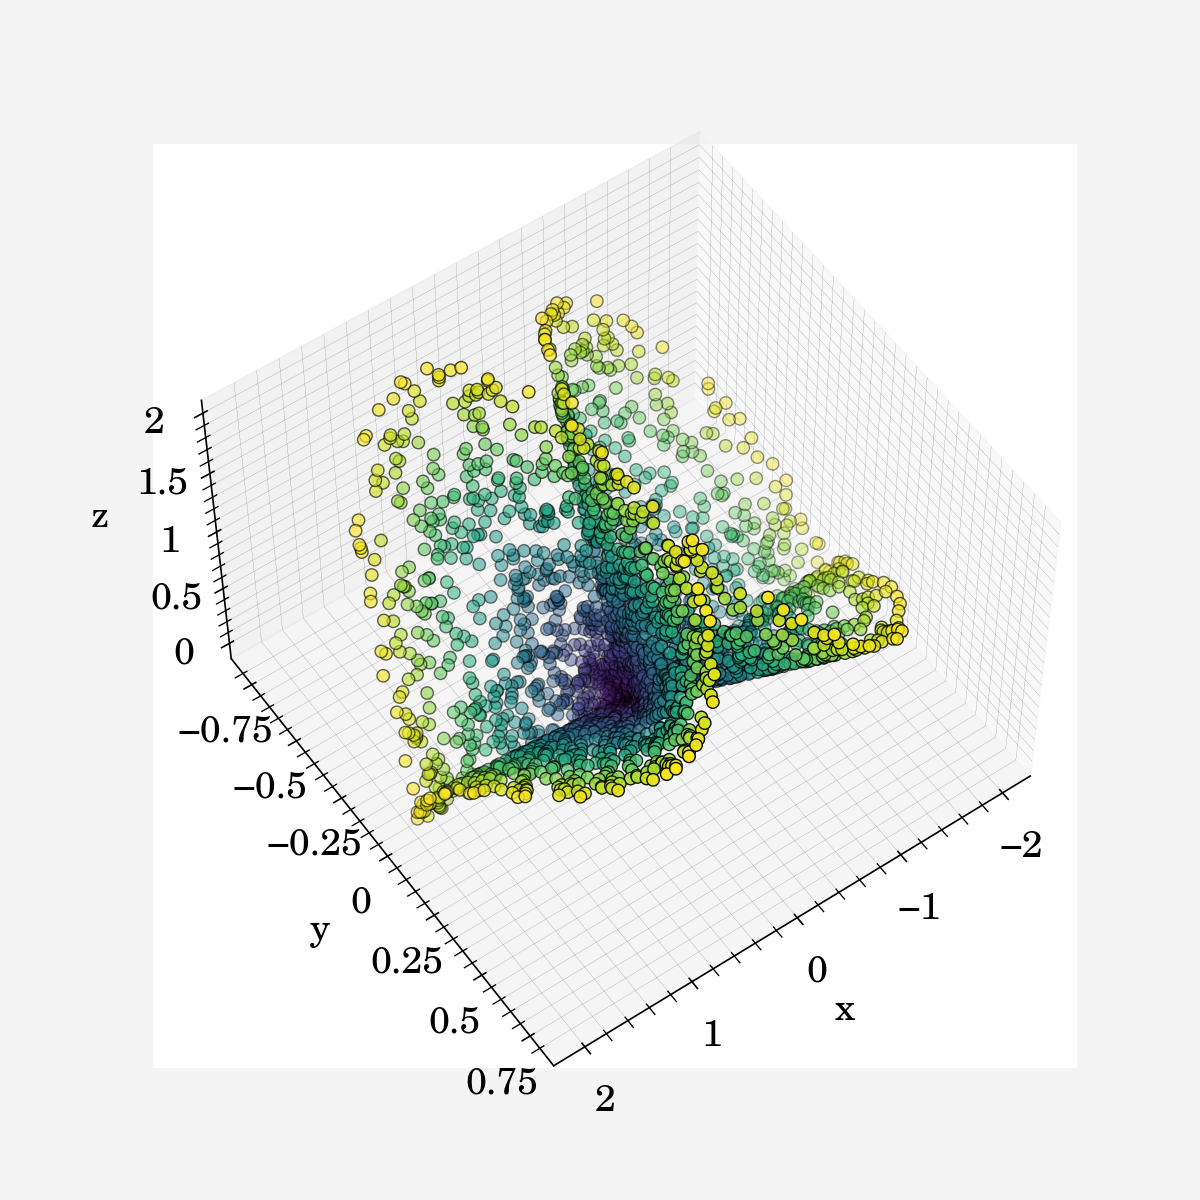

In [3]:
# writing and plotting data
N = 3000

t = np.random.uniform(-np.pi/2, np.pi/2, N)
s = np.arcsin(np.cos(t) ** 2)
r = np.random.uniform(-2, 2, N)

X = np.abs(r) * np.sin(t) * np.cos(s)
Y = r * np.sin(t) * np.sin(s)
Z = np.abs(r) * np.cos(t)

c = np.sqrt(X**2 + Y**2 + Z**2)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, cmap=plt.cm.viridis, c=c,
           s=20, edgecolors='k', linewidth=0.5)
ax.set(xlabel='x', ylabel='y', zlabel='z')
ax.view_init(55, 55)
plt.show()


In [4]:
# recasting the data into a matrix
D = np.array([X,Y,Z]).T

# converting each data point into a 2d array with shape (3, 1)
Data = [d.reshape(1, -1).T for d in D]
Data = np.asarray(Data)

In [5]:
# projecting data on the Grassmannian
Gr = Grassmann(distance_method=Grassmann.grassmann_distance, 
               kernel_method=Grassmann.projection_kernel)

Gr.manifold(p="max", samples=Data) 


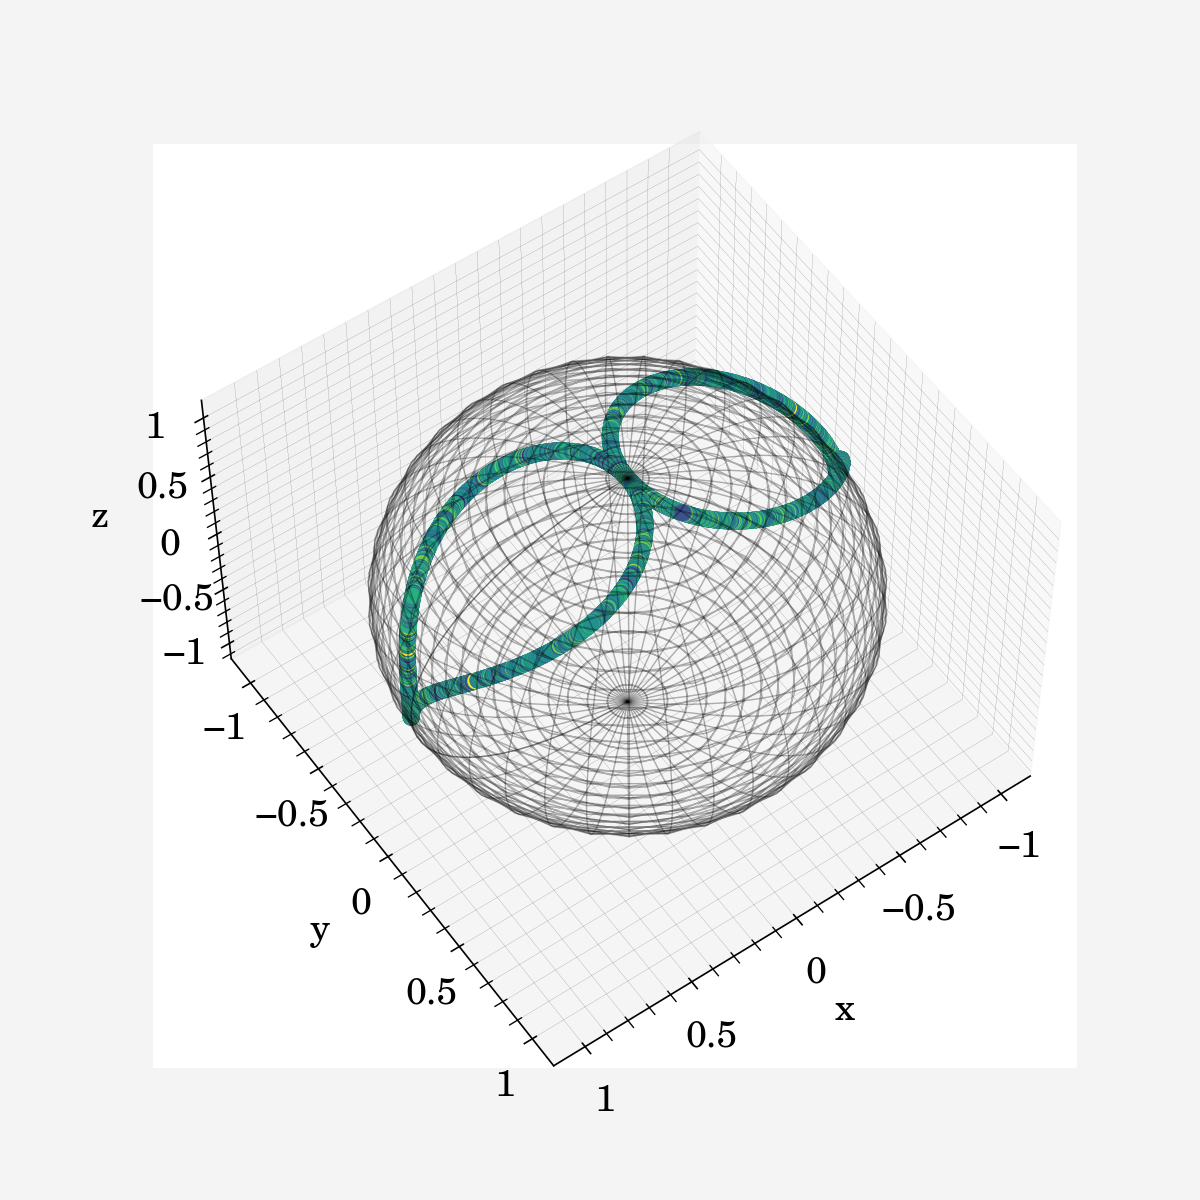

In [6]:
pplt.rc['grid.linewidth'] = 0.04
pplt.rc['grid.alpha'] = 0.01

# points for plotting meshgrid
u, v = np.mgrid[0:4*np.pi:40j, 0:np.pi:40j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

c = np.asarray(Gr.psi)[:, 0]**2 + np.asarray(Gr.psi)[:, 1]**2 + np.asarray(Gr.psi)[:, 2]**2

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter(np.asarray(Gr.psi)[:, 0], np.asarray(Gr.psi)[:, 1], np.asarray(Gr.psi)[:, 2], 
           c=c, 
           cmap=plt.cm.viridis, 
           s=30, alpha=1, zorder=1)
ax.plot_wireframe(x, y, z,  rstride=1, cstride=1, 
                  color='k', alpha=0.3, linewidth=0.5, zorder=2)

ax.set(xlabel='x', ylabel='y', zlabel='z')
ax.view_init(55, 55)
plt.show()


In [7]:
# kernels: psi and phi
kernels = Gr.kernel() 

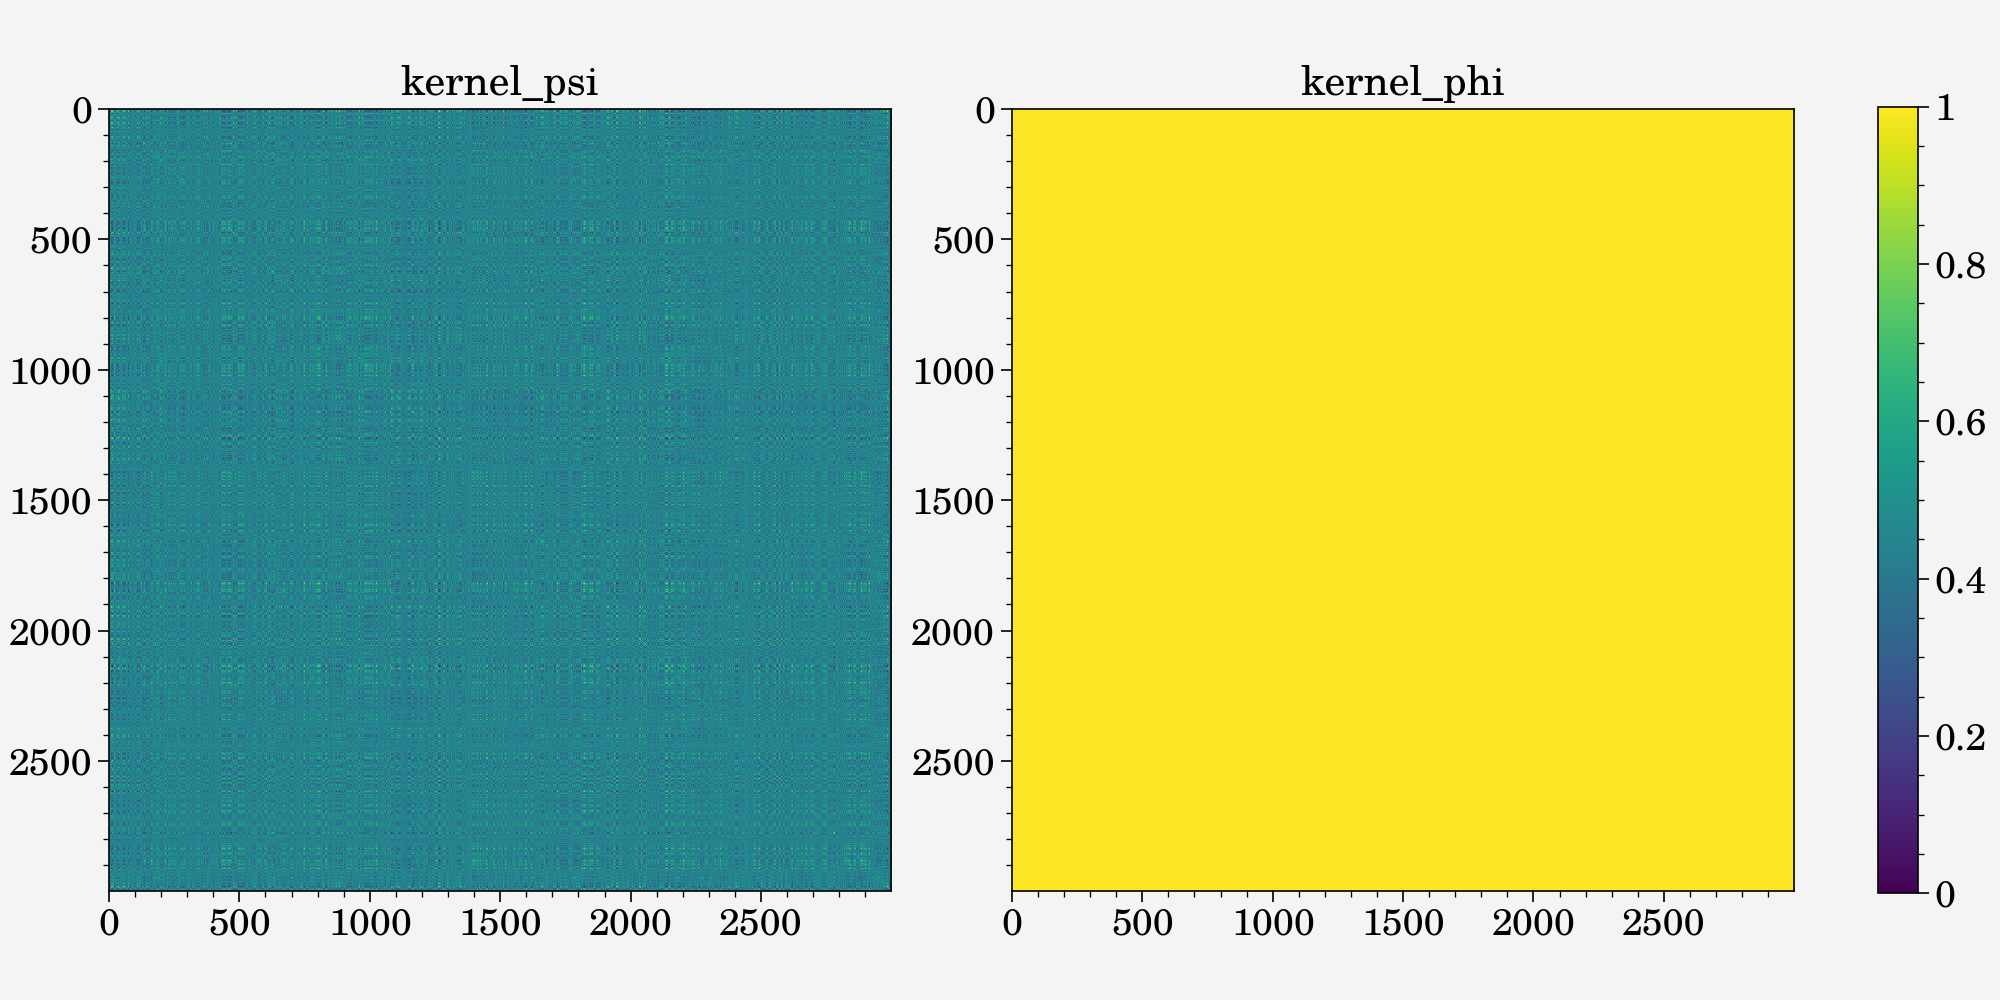

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

axs[0].title.set_text('kernel_psi')
im = axs[0].imshow(kernels[0], cmap='viridis')
clim=im.properties()['clim']

axs[1].title.set_text('kernel_phi')
axs[1].imshow(kernels[1], clim=clim, cmap='viridis')

axs[0].grid(False)
axs[1].grid(False)

fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.8)
plt.show()

In [9]:
kernels[0].shape

(3000, 3000)

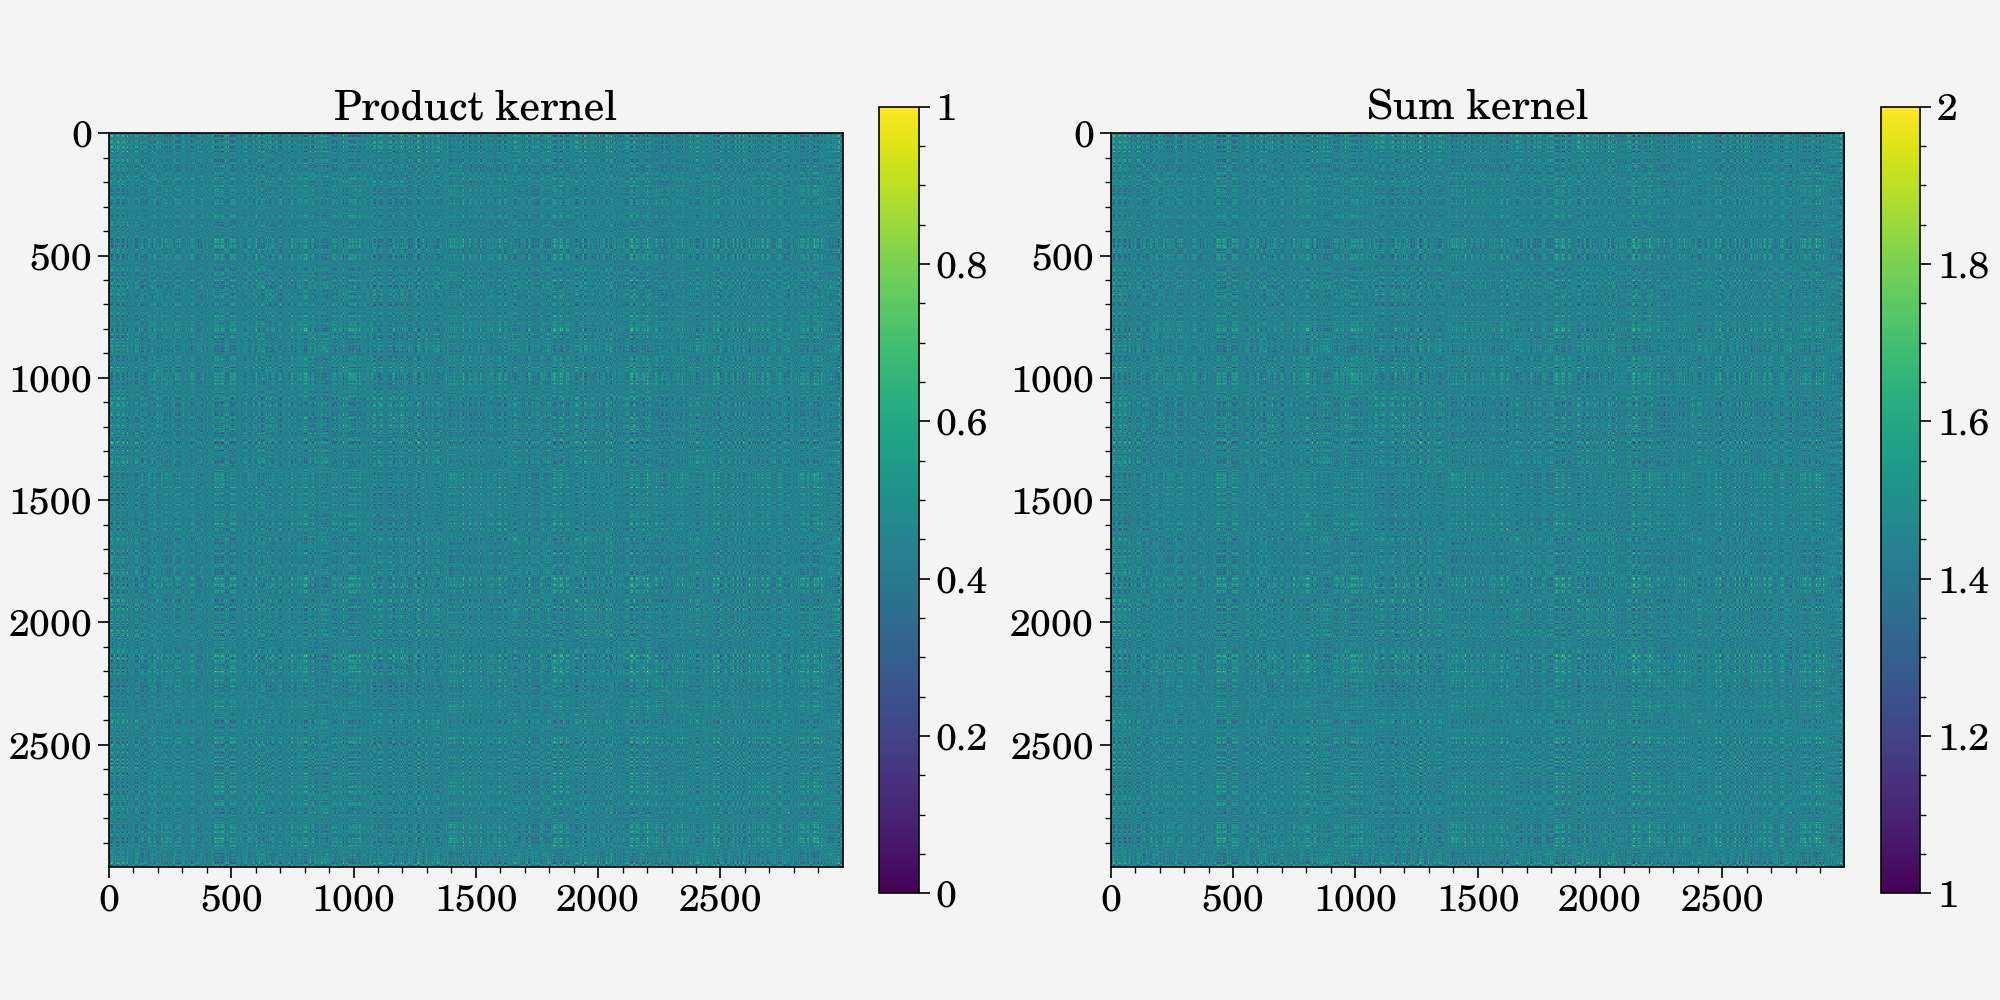

In [10]:
# composed kernel matrices
prod_kernel = kernels[0] * kernels[1]
sum_kernel  = kernels[0] + kernels[1]

fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

axs[0].title.set_text('Product kernel')
im1 = axs[0].imshow(prod_kernel, cmap='viridis')

axs[1].title.set_text('Sum kernel')
im2 = axs[1].imshow(sum_kernel, cmap='viridis')

axs[0].grid(False)
axs[1].grid(False)

fig.colorbar(im1, ax=axs[0], shrink=0.8)
fig.colorbar(im2, ax=axs[1], shrink=0.8)
plt.show()


In [ ]:
# Diffusion Maps
DM = DiffusionMaps(alpha=0.5, 
                   n_evecs=12,
                   kernel_object=DiffusionMaps.gaussian_kernel)

g_dm, evals_dm, evecs_dm = DM.mapping(data=D)


# Grassmannian Diffusion Maps
GDM = DiffusionMaps(alpha=0.5, 
                    n_evecs=12, 
                    kernel_object=Gr, 
                    kernel_grassmann='left')

g_gdm, evals_gdm, evecs_gdm = GDM.mapping()


In [ ]:
# plotting eigenvalues (scree-plot) of DMaps and GDMaps
pplt.rc['grid.linewidth'] = 0.1
pplt.rc['grid.alpha'] = 0.01

fig, ax = plt.subplots()
ax.plot(np.arange(1, len(evals_gdm)), evals_gdm[1:], 's--', 
        c='dimgray', label='GDMaps', markersize=7,
        markeredgecolor='k')
ax.plot(np.arange(1, len(evals_dm)), evals_dm[1:], 'o--', 
        c='darkorange', label='DMaps', markersize=7,
        markeredgecolor='k')
ax.set_xlabel(r'Eigenvalues $\lambda_i$ with $i > 1$')
ax.legend(shadow=True)
plt.grid(alpha=1)
fig.tight_layout()
plt.show()


In [ ]:
pplt.rc['grid.linewidth'] = 0.1
pplt.rc['grid.alpha'] = 0.8

# plotting diffusion coords: DMaps
plot_dcoords_cmaps(dcoords=g_dm,  numbering=['(a)', '(b)'], title='example_dmaps_dcoords.png')

# plotting diffusion coords: GDMaps
plot_dcoords_cmaps(dcoords=g_gdm, numbering=['(c)', '(d)'], title='example_gdmaps_dcoords.png')

In [ ]:
pplt.rc['grid.linewidth'] = 0.04
pplt.rc['grid.alpha'] = 0.01
pplt.rc['title.pad']= 10.0

dmaps_on_grassmann_plot(diff_coord=g_dm, numbering=['(a)', '(b)', '(c)', '(d)'], title='dc_dmaps_3d.png')
dmaps_on_grassmann_plot(diff_coord=g_gdm, numbering=['(a)', '(b)', '(c)', '(d)'], title='dc_gdmaps_3d.png')
